In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier ,StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/smoking-status-prediction-b1/sample_submission.csv
/kaggle/input/smoking-status-prediction-b1/train.csv
/kaggle/input/smoking-status-prediction-b1/test.csv


# Inputting the Data!

In [2]:
train_data=pd.read_csv('/kaggle/input/smoking-status-prediction-b1/train.csv')
test_data=pd.read_csv('/kaggle/input/smoking-status-prediction-b1/test.csv')

In [3]:
train_data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,M,70,175,65,89.8,0.8,1.0,1,1,...,15.5,5,1.3,29,18,53,Y,0,Y,1
1,2,M,40,170,65,86.0,1.2,1.0,1,1,...,15.3,1,1.2,26,23,21,Y,1,Y,1
2,3,M,20,170,70,83.0,1.0,1.0,1,1,...,14.2,1,1.0,17,11,12,Y,0,N,0
3,4,F,60,145,50,77.0,0.4,0.5,1,2,...,12.8,1,0.5,26,12,13,Y,0,N,0
4,5,F,40,160,70,82.9,0.9,0.7,1,1,...,13.8,1,0.9,16,25,20,Y,0,N,0


# Encoding the Non-Numerical Columns

In [4]:
cols = ['gender','oral','tartar']
train_data[cols] = train_data[cols].apply(LabelEncoder().fit_transform)
test_data[cols] = test_data[cols].apply(LabelEncoder().fit_transform)

In [5]:
train_data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,1,70,175,65,89.8,0.8,1.0,1,1,...,15.5,5,1.3,29,18,53,0,0,1,1
1,2,1,40,170,65,86.0,1.2,1.0,1,1,...,15.3,1,1.2,26,23,21,0,1,1,1
2,3,1,20,170,70,83.0,1.0,1.0,1,1,...,14.2,1,1.0,17,11,12,0,0,0,0
3,4,0,60,145,50,77.0,0.4,0.5,1,2,...,12.8,1,0.5,26,12,13,0,0,0,0
4,5,0,40,160,70,82.9,0.9,0.7,1,1,...,13.8,1,0.9,16,25,20,0,0,0,0


In [6]:
test_data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,1,0,45,155,55,78.0,0.8,1.2,1,1,...,72,13.6,1,0.7,19,17,24,0,1,0
1,2,0,40,160,55,74.0,0.9,0.9,1,1,...,114,14.7,1,0.9,32,22,8,0,0,1
2,3,1,40,175,85,97.0,1.5,1.0,1,1,...,97,14.7,1,0.7,20,29,62,0,0,1
3,4,1,60,160,50,72.0,1.0,1.2,1,1,...,107,14.7,1,0.9,22,14,28,0,0,0
4,5,0,50,160,65,88.1,0.7,0.8,1,1,...,155,13.9,1,0.9,36,62,40,0,0,0


# Splitting into Train and Test data!

In [7]:
X = train_data.drop(['ID','smoking'], axis=1)
y = train_data['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,shuffle=True,stratify=y,random_state=42)

# Visualizing Outliers Using BoxPlot

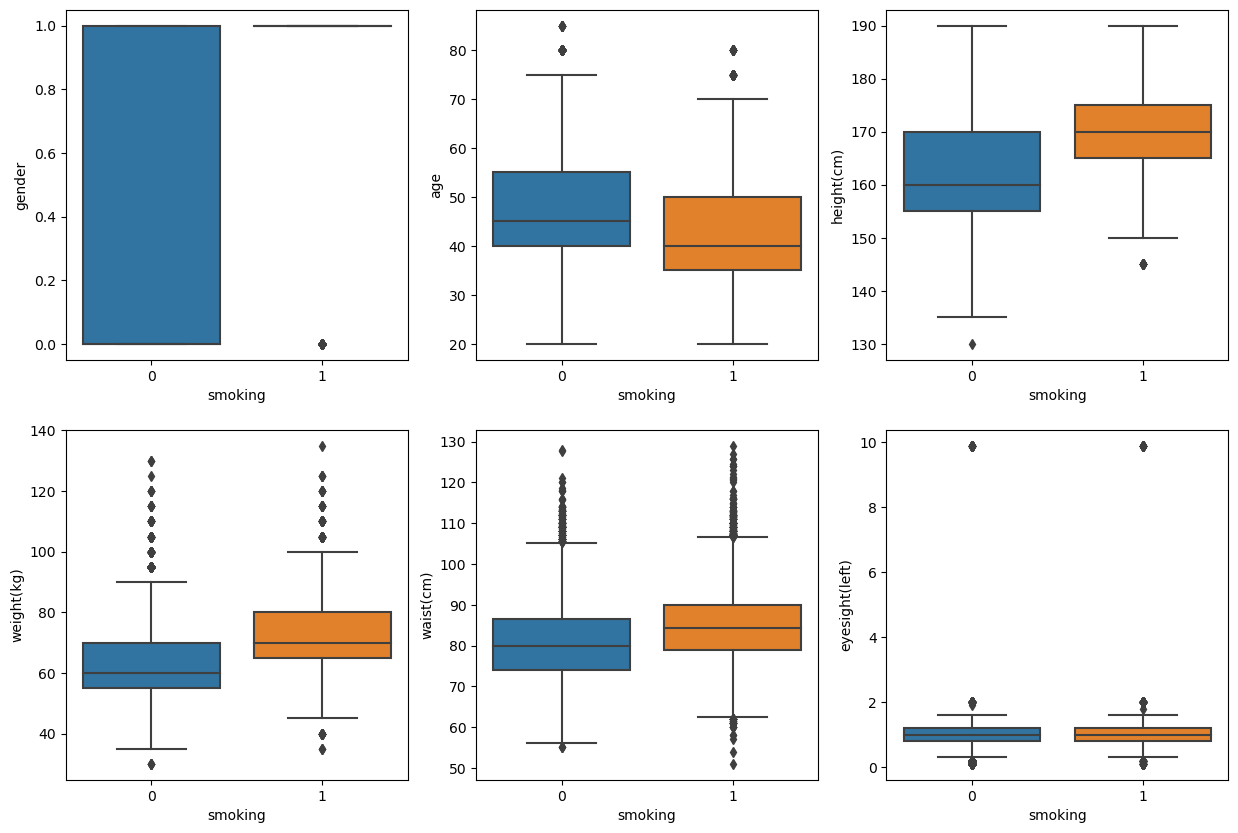

In [8]:
columns = train_data.columns[1:-1].tolist()
fig, ax1 = plt.subplots(2, 3, figsize=(15, 10))
k = 0
for i in range(2):
    for j in range(3):
        if k != 11:
            sns.boxplot(x=train_data['smoking'], y=train_data[columns[k]], ax=ax1[i][j])
            k += 1
plt.show()

# Normalizing the Data!

In [9]:
norm = StandardScaler().fit(X_train)
norm_X_train = norm.fit_transform(X_train)
norm_X_test=norm.transform(X_test)
norm_X_train1=pd.DataFrame(norm_X_train,columns=X_train.columns)


# RFECV

In [20]:
# svc_model = SVC(C=5.0, kernel='rbf', gamma=2.2)
# mlp_model = MLPClassifier(hidden_layer_sizes=(400, 200), activation='tanh', solver='adam', learning_rate='constant', 
#                           learning_rate_init=0.006, max_iter=400, random_state=6)
# gb_model = RandomForestClassifier()
# final_estimator =RandomForestClassifier()
# estimators = [('svc', svc_model), ('mlp', mlp_model), ('gb', gb_model)]
# classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(5), scoring='f1_macro')
# X_rfecv_train=rfecv.fit_transform(norm_X_train,y_train)
# X_rfecv_test=rfecv.transform(norm_X_test)

In [11]:
# print("Selected features:", norm_X_train1.columns[rfecv.support_])

# Finding Null-Accuracy 

In [12]:
# svc_model = SVC(C=5.0, kernel='rbf', gamma=2.2)
# mlp_model = MLPClassifier(hidden_layer_sizes=(400, 200), activation='tanh', solver='adam', learning_rate='constant', 
#                           learning_rate_init=0.006, max_iter=400, random_state=6)
# gb_model = RandomForestClassifier()
# final_estimator =RandomForestClassifier()
# estimators = [('svc', svc_model), ('mlp', mlp_model), ('gb', gb_model)]
# stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# stacking_model.fit(norm_X_train, y)
# y_pred = stacking_model.predict(norm_X_test)

In [13]:
# class_frequencies = y_test.value_counts()
# most_frequent_class = class_frequencies.idxmax()
# null_accuracy = class_frequencies[most_frequent_class] / len(y_test)
# print("Null Accuracy:", null_accuracy)

# Creating a Submission File!

In [14]:
X = train_data.drop(['ID','smoking'], axis=1)
X_test=test_data.drop(['ID'],axis=1)
y = train_data['smoking']

In [15]:
norm = StandardScaler()
norm_X_train = norm.fit_transform(X)
norm_X_test=norm.transform(X_test)

***Below Model gives nullClassification Accuracy of 0.80566 (Public Leaderboard)***

In [16]:
# svc_model = SVC(C=5.0, kernel='rbf', gamma=2.2)
# mlp_model = MLPClassifier(hidden_layer_sizes=(400, 200), activation='tanh', solver='adam', learning_rate='constant', 
#                           learning_rate_init=0.006, max_iter=400, random_state=6)
# gb_model = RandomForestClassifier()
# final_estimator =RandomForestClassifier()
# estimators = [('svc', svc_model), ('mlp', mlp_model), ('gb', gb_model)]
# stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# stacking_model.fit(norm_X_train, y)
# y_pred = stacking_model.predict(norm_X_test)

***Below Model gives nullClassification Accuracy of 0.71148 (Public Leaderboard)***

In [18]:
base_classifiers = [
    ('naive_bayes', GaussianNB()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)),
    ('logistic', LogisticRegression(solver='liblinear', random_state=42)),
    ('j48', DecisionTreeClassifier(criterion='entropy', min_samples_split=2))
]
stacking_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
    cv=5
)
stacking_model.fit(norm_X_train, y)
y_pred = stacking_model.predict(norm_X_test)

In [19]:
submission = pd.DataFrame({"ID": test_data["ID"], "smoking": y_pred})
submission.to_csv("submission.csv", index=False)